<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQk4anYFFsY3OTqb6RP4oTBhqPM0P1u80tSRA&usqp=CAU" width=150 height=100>

*Algirdas Laukaitis* 

#Data Analysis using Python: Pandas and a bit SQL

<p>This tutorial on <strong style="color:navy;">Basic Data Mining</strong> will guide you through a scenario for a targeted mailing campaign. Using the <em style="color:darkgreen;">AdventureWorks DW dataset</em>, you will create several models to analyze customer purchasing behavior and identify potential buyers. Throughout the tutorial, you will learn how to use various data mining algorithms, mining model viewers, and data mining tools that are available in Python.</p>
<p>The <strong style="color:navy;">AdventureWorks DW dataset</strong> is a widely-used database that contains data on a fictitious bicycle company, <em style="color:darkgreen;">Adventure Works Cycles</em>. The database includes various tables that contain information on customers, products, sales, and more. By utilizing this dataset, you can practice and hone your data mining skills to gain valuable insights and make informed decisions.</p>


##Tutorial Scenario

<p>In this tutorial, you will play the role of an employee at Adventure Works Cycles. Your task is to learn more about the company’s customers based on their historical purchases and use that data to make predictions that can be used in marketing. The company’s senior analyst has provided you with a dataset called vTargetMail.csv. You will analyze this new dataset specifically for data mining and set up several data mining models. </p>

[AdventureWorks DW schema](https://github.com/aalgirdas/AdventureWorksDW/blob/main/AdventureWorksDW2008.png)

##Let’s load the vTargetMail.csv data into a dataframe from GitHub.

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', 50)  # The code sets an option to display a maximum of 50 columns in the output. 
df = pd.read_csv('https://raw.githubusercontent.com/aalgirdas/AdventureWorksDW/main/vTargetMail.csv', sep='\t')  # The 'sep' argument is used to specify that the CSV file is tab-separated

print("The dataframe has {} rows and {} columns.".format(df.shape[0], df.shape[1]))

The dataframe has 18484 rows and 32 columns.


##Next, we will examine the first row of the data to determine which information is relevant to our task.

In [ ]:
print(df.iloc[0]) # The first row of the DataFrame df.

CustomerKey                                 11000
GeographyKey                                   26
CustomerAlternateKey                   AW00011000
Title                                         NaN
FirstName                                     Jon
MiddleName                                      V
LastName                                     Yang
NameStyle                                   False
BirthDate                     1966-04-08 00:00:00
MaritalStatus                                   M
Suffix                                        NaN
Gender                                          M
EmailAddress            jon24@adventure-works.com
YearlyIncome                                90000
TotalChildren                                   2
NumberChildrenAtHome                            0
EnglishEducation                        Bachelors
SpanishEducation                     Licenciatura
FrenchEducation                           Bac + 4
EnglishOccupation                    Professional


##We remove attributes that we don’t require

In [ ]:
df.drop(columns=["CustomerKey", "GeographyKey", "CustomerAlternateKey","Title" ,"FirstName","MiddleName","LastName","NameStyle","Suffix", "EmailAddress" ,"SpanishEducation","FrenchEducation","SpanishOccupation","FrenchOccupation","AddressLine1","AddressLine2","Phone"], inplace=True)
print(df.iloc[0]) 

BirthDate               1966-04-08 00:00:00
MaritalStatus                             M
Gender                                    M
YearlyIncome                          90000
TotalChildren                             2
NumberChildrenAtHome                      0
EnglishEducation                  Bachelors
EnglishOccupation              Professional
HouseOwnerFlag                            1
NumberCarsOwned                           0
DateFirstPurchase       2001-07-22 00:00:00
CommuteDistance                   1-2 Miles
Region                              Pacific
Age                                      56
BikeBuyer                                 1
Name: 0, dtype: object


<b><font color='blue'>Story provides an excellent example of how data can be used to create a narrative that helps to identify patterns and behaviors among customers, allowing for more targeted and effective marketing strategies.</font></b>


>>*Jon Yang is a 56-year-old professional who lives in the Pacific region. He has a yearly income of $90,000 and is a house owner. Jon has two children, but none of them live with him. He doesn’t own a car and commutes 1-2 miles to work. Jon is a bike buyer and made his first purchase from AdventureWorks on July 22, 2001.*


#Data exploration: 
The process of examining *vTargetMail.csv* to uncover patterns, associations, and data quality issues. It involves answering questions like: What values are in each attribute? Any outliers? What are the attribute relationships? Do value distributions match expectations?

Customer data is usually accompanied by some metadata or documentation that outlines what it's supposed to contain, but that's just boring. The real fun lies in discovering what it actually contains, and if we're lucky, figuring out why it's there in the first place.


In [ ]:
from google.colab.data_table import DataTable 
DataTable.max_columns = 32
df

,BirthDate,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,EnglishOccupation,HouseOwnerFlag,NumberCarsOwned,DateFirstPurchase,CommuteDistance,Region,Age,BikeBuyer
0,1966-04-08 00:00:00,M,M,90000,2,0,Bachelors,Professional,1,0,2001-07-22 00:00:00,1-2 Miles,Pacific,56,1
1,1965-05-14 00:00:00,S,M,60000,3,3,Bachelors,Professional,0,1,2001-07-18 00:00:00,0-1 Miles,Pacific,57,1
2,1965-08-12 00:00:00,M,M,60000,3,3,Bachelors,Professional,1,1,2001-07-10 00:00:00,2-5 Miles,Pacific,57,1
3,1968-02-15 00:00:00,S,F,70000,0,0,Bachelors,Professional,0,1,2001-07-01 00:00:00,5-10 Miles,Pacific,55,1
4,1968-08-08 00:00:00,S,F,80000,5,5,Bachelors,Professional,1,4,2001-07-26 00:00:00,1-2 Miles,Pacific,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18479,1958-07-04 00:00:00,M,M,30000,1,0,Graduate Degree,Clerical,1,0,2003-03-08 00:00:00,0-1 Miles,Europe,64,1
18480,1960-11-10 00:00:00,S,F,30000,3,0,Graduate Degree,Clerical,1,0,2004-01-18 00:00:00,0-1 Miles,Europe,62,1
18481,1960-01-05 00:00:00,S,M,30000,3,0,Graduate Degree,Clerical,0,0,2002-02-13 00:00:00,0-1 Miles,Europe,63,1
18482,1959-03-05 00:00:00,M,M,30000,3,0,Bachelors,Clerical,1,0,2003-03-22 00:00:00,0-1 Miles,Europe,64,1


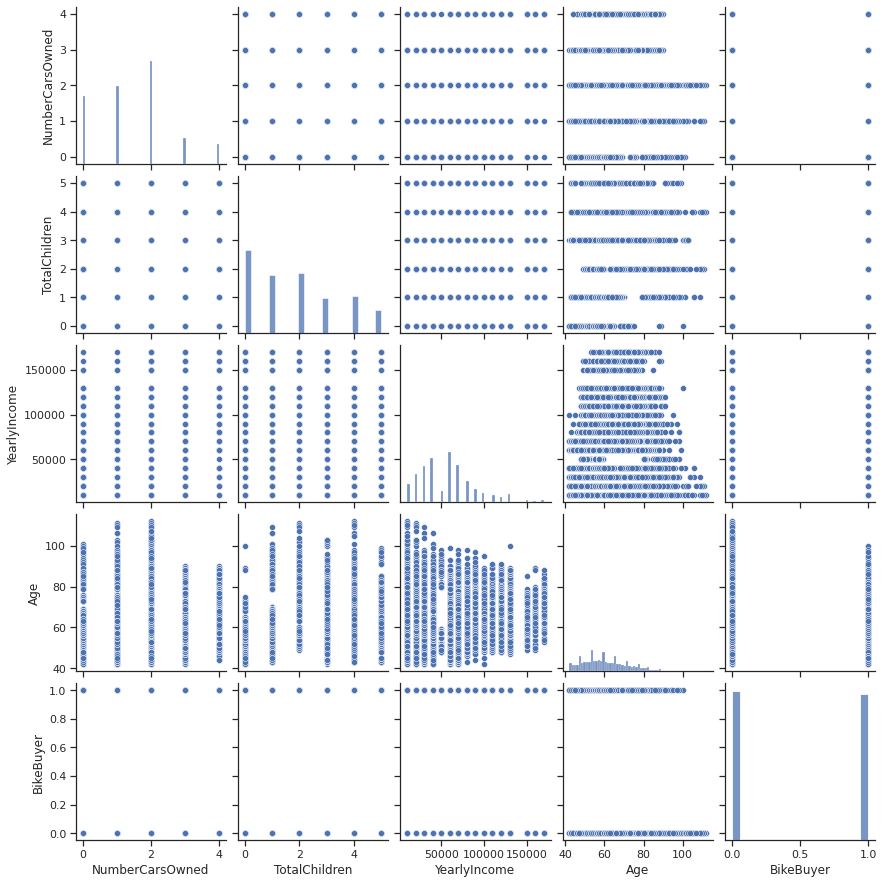

In [ ]:
df2 = df.loc[:, ['NumberCarsOwned', 'TotalChildren', 'MaritalStatus', 'Gender', 'YearlyIncome','CommuteDistance', 'Age', 'BikeBuyer']]
#df2['Gender'] = df2['Gender'].replace({'M': 0, 'F': 1})
#df2['MaritalStatus'] = df2['MaritalStatus'].replace({'S': 0, 'M': 1})

import seaborn as sns
sns.set(style="ticks")
sns.pairplot(df2 )  # , hue="BikeBuyer"  , kind='reg' , hue="BikeBuyer"  , kind='reg', diag_kind='kde' , diag_kind='hist'

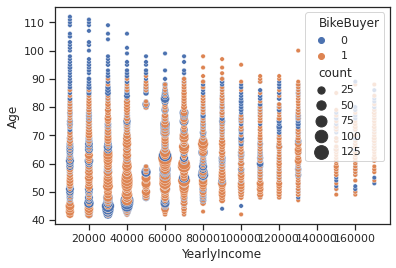

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each combination 
counts = df2.groupby(['YearlyIncome', 'Age', 'BikeBuyer']).size().reset_index(name='count')

# Create a scatter plot with point size reflecting the frequency of values
sns.scatterplot(data=counts, x='YearlyIncome', y='Age', hue="BikeBuyer", size='count', sizes=(20, 200))

# Show the plot
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

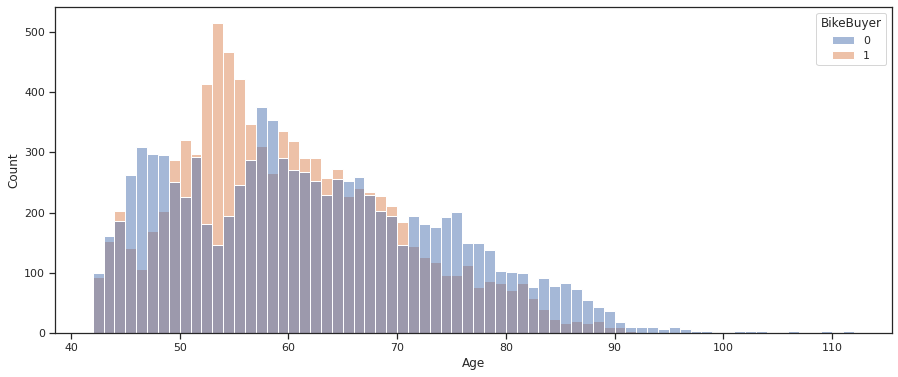

In [ ]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(15, 6)) 
sns.histplot(x="Age", hue="BikeBuyer", data=df2, binwidth=1)

#plt.figure(figsize=(15, 6)) 
#sns.histplot(x='Age', hue='BikeBuyer', data=df2, multiple='stack', element='step', alpha=0.5)


In [ ]:
df_random = df.sample(n=1000, random_state=42)

<Axes: xlabel='BikeBuyer', ylabel='Count'>

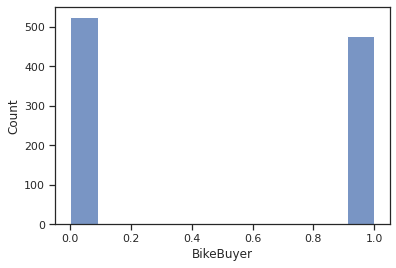

In [ ]:
sns.histplot(x="BikeBuyer" , data=df_random)

<Axes: xlabel='BikeBuyer', ylabel='Count'>

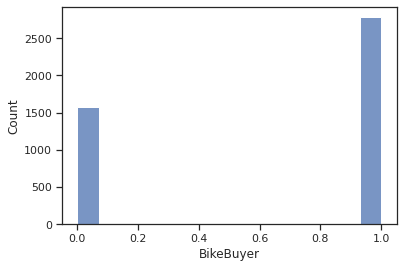

In [ ]:
df3 = df2.query("Age >= 50 and Age <= 56 ")  # and CommuteDistance = '0-1 Miles'   and NumberCarsOwned == 0   and TotalChildren <= 2

#df_random2 = df.query("Age >= 50 and Age <= 56 ").sample(n=1000) # and CommuteDistance = '0-1 Miles'   and NumberCarsOwned == 0   and TotalChildren <= 2   + str(df3.size)

sns.histplot(x="BikeBuyer"  , data=df3)


In [ ]:
# Using -q suppress output and install pandasql package
!pip install -q pandasql

from pandasql import sqldf


query = """
        SELECT AVG(YearlyIncome) AS mean_income,
               MIN(TotalChildren) AS min_children,
               MAX(NumberCarsOwned) AS max_cars
        FROM df
        """
result = sqldf(query)
print(result)
print()

query = " SELECT CommuteDistance , COUNT(1) FROM df GROUP BY CommuteDistance """
result = sqldf(query)
print(result)
print()

query = """
        SELECT 10000*CAST(YearlyIncome/10000 AS INTEGER) YI_bin, 
        SUM(CASE WHEN BikeBuyer = 0 THEN 1 ELSE 0 END) as No_BikeBuyer,
        SUM(CASE WHEN BikeBuyer = 1 THEN 1 ELSE 0 END) as Yes_BikeBuyer
        FROM df
        GROUP BY CAST(YearlyIncome/10000 AS INTEGER)
        """
result = sqldf(query)
print(result)
print()






  Preparing metadata (setup.py) ... done
   mean_income  min_children  max_cars
0  57305.77797             0         4

  CommuteDistance  COUNT(1)
0       0-1 Miles      6310
1       1-2 Miles      3232
2       10+ Miles      2494
3       2-5 Miles      3234
4      5-10 Miles      3214

    YI_bin  No_BikeBuyer  Yes_BikeBuyer
0    10000           717            438
1    20000          1019            748
2    30000          1135           1152
3    40000          1280           1467
4    50000           355            315
5    60000          1549           1578
6    70000          1059           1290
7    80000           755            587
8    90000           379            463
9   100000           320            251
10  110000           253            221
11  120000           160            172
12  130000           250            262
13  150000            47             56
14  160000            36             58
15  170000            38             74



#Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

BikeBuyer_x = df3.drop('BikeBuyer', axis=1)
BikeBuyer_y = df3['BikeBuyer']

BikeBuyer_x_encoded = pd.get_dummies(BikeBuyer_x, drop_first=True)
BikeBuyer_x_encoded  




,NumberCarsOwned,TotalChildren,YearlyIncome,Age,MaritalStatus_S,Gender_M,CommuteDistance_1-2 Miles,CommuteDistance_10+ Miles,CommuteDistance_2-5 Miles,CommuteDistance_5-10 Miles
0,0,2,90000,56,0,1,1,0,0,0
3,1,0,70000,55,1,0,0,0,0,1
4,4,5,80000,54,1,0,1,0,0,0
12,2,2,100000,55,0,0,1,0,0,0
13,3,2,100000,54,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
18373,2,1,30000,56,0,1,0,0,0,0
18388,0,0,40000,56,0,1,0,0,0,0
18390,0,0,40000,56,1,0,0,0,0,0
18391,0,0,40000,56,1,0,0,0,0,0


In [ ]:


X_train, X_test, y_train, y_test = train_test_split(BikeBuyer_x_encoded, BikeBuyer_y, test_size=0.3)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dtree = DecisionTreeClassifier(max_depth=3)
dtree.fit(X_train, y_train)
predicitions = dtree.predict(X_test)
acc = accuracy_score(y_test, predicitions)
acc

0.7469418960244648

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=((25,20)))
plot_tree(dtree, feature_names = BikeBuyer_x_encoded.columns, class_names=['not BikeBuyer', 'yes BikeBuyer'],    impurity=False,    proportion=True,  filled=True)
fig.savefig('decision_tree_plot_V1.png')

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import pandas as pd
import graphviz

dot_data = export_graphviz(dtree, out_file=None,  feature_names=BikeBuyer_x_encoded.columns,   class_names=['0', '1'],  filled=True, rounded=True, special_characters=True) # Generate graphviz object

graph = graphviz.Source(dot_data)
graph.render("decision_tree_plot_V2", format="png", cleanup=True)

'decision_tree_plot_V2.png'

In [ ]:
from sklearn.tree import DecisionTreeClassifier

best_acc = 0

for criterion in "gini", "entropy":
    for max_depth in [2,3,4,5,6]:
        for min_samples_leaf in [5, 10, 20, 30]:
            dtree = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion, min_samples_leaf=min_samples_leaf)
            dtree.fit(X_train, y_train)
            predicitions = dtree.predict(X_test)
            acc = accuracy_score(y_test, predicitions)
            if acc > best_acc:
                best_params = f"criterion: {criterion}, max_depth: {max_depth}, min_samples_leaf: {min_samples_leaf}"
                best_acc = acc

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Convert Gender and MaritalStatus columns to categorical data type
df3['Gender'] = df3['Gender'].astype('category')
df3['MaritalStatus'] = df3['MaritalStatus'].astype('category')
df3['CommuteDistance'] = df3['CommuteDistance'].astype('category')



# Split the data into training and testing sets
X = df3.drop('BikeBuyer', axis=1)
y = df3['BikeBuyer']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create decision tree classifier
clf = DecisionTreeClassifier(random_state=42, max_depth=3)

# Convert Gender column to numerical codes
X_train['Gender'] = X_train['Gender'].cat.codes
X_test['Gender'] = X_test['Gender'].cat.codes

X_train['MaritalStatus'] = X_train['MaritalStatus'].cat.codes
X_test['MaritalStatus'] = X_test['MaritalStatus'].cat.codes

X_train['CommuteDistance'] = X_train['CommuteDistance'].cat.codes
X_test['CommuteDistance'] = X_test['CommuteDistance'].cat.codes


# Train the model
clf.fit(X_train, y_train)

# Evaluate the model on the test set
score = clf.score(X_test, y_test)
print('Accuracy: {:.2f}'.format(score))


Accuracy: 0.72


<ipython-input-43-68918598521c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Gender'] = df3['Gender'].astype('category')
<ipython-input-43-68918598521c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['MaritalStatus'] = df3['MaritalStatus'].astype('category')
<ipython-input-43-68918598521c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import pandas as pd
import graphviz

# Generate graphviz object
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=X_train.columns.tolist(),
                           class_names=['0', '1'],
                           filled=True, rounded=True,
                           special_characters=True)

# Plot the tree
graph = graphviz.Source(dot_data)
graph.render("decision_tree_plot_V3", format="png", cleanup=True)



'decision_tree_plot.png'

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_text
# Print the decision tree
tree_rules = export_text(clf, feature_names=X_train.columns.tolist())
print(tree_rules)

|--- NumberCarsOwned <= 1.50
|   |--- Age <= 51.50
|   |   |--- CommuteDistance <= 0.50
|   |   |   |--- class: 1
|   |   |--- CommuteDistance >  0.50
|   |   |   |--- class: 1
|   |--- Age >  51.50
|   |   |--- YearlyIncome <= 25000.00
|   |   |   |--- class: 1
|   |   |--- YearlyIncome >  25000.00
|   |   |   |--- class: 1
|--- NumberCarsOwned >  1.50
|   |--- YearlyIncome <= 85000.00
|   |   |--- CommuteDistance <= 3.50
|   |   |   |--- class: 0
|   |   |--- CommuteDistance >  3.50
|   |   |   |--- class: 1
|   |--- YearlyIncome >  85000.00
|   |   |--- TotalChildren <= 1.50
|   |   |   |--- class: 1
|   |   |--- TotalChildren >  1.50
|   |   |   |--- class: 0

